# Data exploration of employment data
## Data Source 1: Labour Market Information (LMI) Organisation
Details can be found at http://www.lmiforall.org.uk/
They ran a hackathon back in Feb 2014, here's a link to a pdf for the event explaining how to access the data http://www.lmiforall.org.uk/wp-content/uploads/2014/10/CareerHack-How-to-Guide.pdf
And here is a link to their api: http://api.lmiforall.org.uk/

To access their API I'm going to use the requests module, to install this module do a `pip install requests`

In [233]:
import requests


### Standard Occupation Classification (SOC)
Much of the API relies on something called an SOC code, these are 4 digit (I think sometimes you see 3 numbers which represent a group) codes that correspond to a particular occupation classification. e.g. 9120 corresponds to "Elementary Construction Occupations" and contains job titles such as brick layer, plumber, plasterer, etc.

A full list of these codes can be found at https://www.gov.uk/government/uploads/system/uploads/attachment_data/file/303033/CoP_-_Apr_14_V0_6.pdf
### API

Let's search job titles by keyword, this returns a list of job titles and their SOC codes

In [234]:
r = requests.get('http://api.lmiforall.org.uk/api/v1/soc/search?q=plumber')

In [235]:
r.content

'[{"soc":5314,"title":"Plumbers and heating and ventilating engineers","description":"Jobholders in this unit group assemble, install, maintain and repair plumbing fixtures, heating and ventilating systems and pipes and pipeline systems in commercial, residential and industrial premises and public buildings.","qualifications":"There are no formal academic requirements although GCSEs/S grades are advantageous. NVQs/SVQs in Mechanical Engineering Services are available at Levels 2 and 3. Apprenticeships are available for plumbing and lead to an NVQ/SVQ at Level 3.","tasks":" examines drawings and specifications to determine layout of system;\\n measures and cuts required lengths of copper, lead, steel, iron, aluminium or plastic using hand or machine tools;\\n installs fittings such as storage tanks, cookers, baths, toilets, taps and valves, refrigerators, boilers, radiators and fires;\\n tests completed installation for leaks and makes any necessary adjustments;\\n attaches fittings and

To get information about a particular SOC code

In [236]:
r = requests.get('http://api.lmiforall.org.uk/api/v1/soc/code/9120')
r.content

'{"soc":9120,"tasks":" conveys blocks, bricks, stone, mortar, roofing, felt, slates, wood and other building materials to the work area;\\n assists with the erection of ladders, scaffolding and work platforms, the rigging of cradles of hoisting equipment and the attaching of slings, hooks and guide ropes;\\n mixes mortar, grouting material, cement screed, and plaster, prepares adhesive, primer and paints and similar construction material, and undertakes basic decorating, painting, plumbing and other maintenance and repair tasks;\\n cleans equipment and tools, clears work area and otherwise assists building and woodworking trades workers as directed;\\n performs general labouring tasks such as digging trenches and foundations, removing wall coverings, and preparing surfaces by cleaning, sanding, filling, etc.;\\n covers ceilings, floors, walls and exposed surfaces of boilers, pipes and plant with insulating material;\\n heats and breaks up blocks of asphalt, bitumen or tar, stirs meltin

After exploring this data I don't think it really has the kind of detail I'm looking for in this article. It is a bit too general in the skill sets required for a job and they don't really have any concept of what a data scientist is. Also the universal jobmatch api lists very basic information, in particular salaries, as well as only having a snippet of the job descriptions.

## Datasource 2: Universal Jobmatch
Univesal Jobmatch is a website run by the goverment which lists various job listings. Their policies on web scraping are much more open than sites such as LinkedIn, Indeed, Monster, etc. Here I'm using data collected from home.zois.co.uk a consultancy based in Cockermouth, England. You can get this data from ftp://ftp.zois.co.uk/pub/jcp. 

In [237]:
import csv

In [238]:
csv_file = open('/Users/dvoong/projects/data_science_jobs/raw_data/UJM-scrape-2015-07-30.csv')
reader = csv.DictReader(csv_file)
jobs = list(reader)
print jobs[0]

{'salary': '8.00 - 9.00 per hour GBP8.00 - GBP9 per hour + time and a half after 8 hours', 'noted': '2015-07-30 23:45:01.0662', 'added': '2015-07-30', 'description': 'Class 2 tipper Drivers needed for various contracts. Regular work Mon - Fri Days Must have relevant experience Digi card CPC cARD Apply', 'reference': 'Tipper_1438261410', 'title': 'Class 2 Tipper Drivers', 'career': '', 'company': 'LMR', 'job_type': 'Full time', 'jobid': '17750894', 'contact': '', 'location': 'UK-TT-Newcastle upon Tyne', 'apply': 'http://www.aplitrak.com/?adid=RGFtaWVubS41NDUwMy41ODE4QGxtci5hcGxpdHJhay5jb20', 'education': '', 'industry': 'Staffing/employment agencies'}


In [239]:
from pandas import Series, DataFrame


In [240]:
df = DataFrame(jobs)

In [241]:
df


,added,apply,career,company,contact,description,education,industry,job_type,jobid,location,noted,reference,salary,title
0,2015-07-30,http://www.aplitrak.com/?adid=RGFtaWVubS41NDUw...,,LMR,,Class 2 tipper Drivers needed for various cont...,,Staffing/employment agencies,Full time,17750894,UK-TT-Newcastle upon Tyne,2015-07-30 23:45:01.0662,Tipper_1438261410,8.00 - 9.00 per hour GBP8.00 - GBP9 per hour +...,Class 2 Tipper Drivers
1,2015-07-30,Email: carla.austin@proactivepersonnel.net,Experienced (Non-Manager),Proactive Personnel Limited,,Proactive Personnel Ltd is proud to be represe...,,Engineering services,Full time,17751620,UK-TT-Newcastle upon Tyne,2015-07-30 23:45:00.736214,,11.00 - 13.00 per hour,HGV TECHNICIAN
2,2015-07-27,http://jobview.monster.co.uk/Area-Sales-Manage...,,Monster UK,,Excellent career opportunity for an experience...,,Other/not classified,Full time,17744370,UK-Southern-Sevenoaks,2015-07-30 23:45:00.547762,529S,"30,000.00 - 45,000.00 per year car, non contri...",Area Sales Manager - South East England
3,2015-07-27,http://jobview.monster.co.uk/Senior-Data-Netwo...,,Monster UK,,A British retail and commercial bank that curr...,Undergraduate degree,Other/not classified,Full time,17744369,UK-London-City of London,2015-07-30 23:44:59.896126,2483477_1437985282,"52,000.00 - 61,000.00 per year package",Senior Data Network Technical Specialist
4,2015-07-30,http://www.aplitrak.com/?adid=cmViZWNjYXNhbGtl...,,Capita Education Resourcing,,"Are you a qualified, committed and passionate ...",,Staffing/employment agencies,Full time,17751766,UK-TT-Newcastle upon Tyne,2015-07-30 23:44:59.787681,LEVEL28253_1438265103,51.00 - 80.00 GBP51 - GBP80 per day,Level 3 Nursery Nurse
5,2015-07-30,/Apply/ApplyStart.aspx?jobid=17752211,None,AplusRecruit,,Care Assistant and Senior Carer for elderly ca...,,Healthcare services,Full time,17752211,UK-TT-Newcastle upon Tyne,2015-07-30 23:44:59.287527,,6.55 - 7.00 per hour,Care Assistant and Senior Carer
6,2015-07-27,http://jobview.monster.co.uk/Senior-Java-Devel...,,Monster UK,,Senior Java Developer - Java/J2EE/Agile Fantas...,,Other/not classified,Full time,17744364,UK-SW-Bristol,2015-07-30 23:44:59.234033,97768_1437985188,"50,000.00 - 75,000.00 per year",Senior Java Developer - JEE/Agile/Oracle
7,2015-07-30,"Joe Suite 1, 8 Station Square Romford, HC RM2 ...",None,Total Site,,Pedestrian Crane driver required for a site in...,CSE or equivalent,Construction - industrial facilities and infra...,Full time,17744362,UK-HC-Ware,2015-07-30 23:44:58.834627,,175.00,"Pedestrian Crane Driver £175.00 per day Ware, ..."
8,2015-07-30,Phone: 01908370700,,Constructive Resources LTD,,I am looking for several Electricians for on-g...,,Construction - industrial facilities and infra...,Full time,17752437,UK-TT-Newcastle upon Tyne,2015-07-30 23:44:58.414469,,,Electrician
9,2015-07-30,Phone: 01908370700,,Constructive Resources LTD,,I am looking for several Electricians Mates fo...,,Construction - industrial facilities and infra...,Full time,17752473,UK-TT-Newcastle upon Tyne,2015-07-30 23:44:58.015942,,,Electricians Mate


Here I'm looking maximum length of strings for the columns "added" and "apply". I have to use the [] notation for apply since apply is a reserved keyword for the data frame object. The idea is to import this data into a relational database, in order to do this I need some sense of how long the strings will be in each of the columns.

In [242]:
print df.added.map(lambda x: len(x)).max()
print df['apply'].map(len).max()

10
250


In [243]:
df.columns

Index([u'added', u'apply', u'career', u'company', u'contact', u'description',
       u'education', u'industry', u'job_type', u'jobid', u'location', u'noted',
       u'reference', u'salary', u'title'],
      dtype='object')

In [244]:
for column_name in df.columns:
    print '{}: {}'.format(column_name, df[column_name].map(len).max())

added: 10
apply: 250
career: 37
company: 61
contact: 0
description: 24426
education: 50
industry: 56
job_type: 28
jobid: 8
location: 63
noted: 26
reference: 50
salary: 286
title: 99


I wonder what the distribution of the string lengths look like?

In [245]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


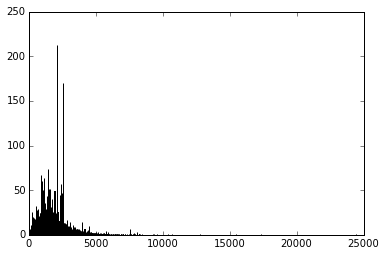

In [246]:
# Histogramming
x = df['description'].map(len)
(n, bins, patches) = plt.hist(x, 25000)

Wow someone went a bit overboard on one of those descriptions, looks like they wrote a whole bloody essay on it?! Let's have a look at it.

In [247]:
df2 = df[df['description'].map(len) == 24426 ]

In [248]:
print df2

            added                                              apply career  \
33289  2015-07-29  http://www.adzuna.co.uk/jobs/land/ad/298803314...          

      company contact                                        description  \
33289  Adzuna          A web developer is required who will be respon...   

      education           industry   job_type     jobid             location  \
33289            Internet services  Full time  17709836  UK-Scotland-Lothian   

                            noted      reference  \
33289  2015-07-30 00:10:46.651194  ADZ/298803314   

                                                  salary  \
33289  26,274.00 - 30,434.00 per year From £26,274 to...   

                        title  
33289  Web developer for NARF  


In [249]:
print df2.ix[33289].description


A web developer is required who will be responsible for the ongoing maintenance and development of the NARF web presence, in collaboration with local business users and other University colleagues, to deliver a resource to support the business of a national research facility. Generation of web-based searchable databases, which will make available the NARF information on the tools and resources widely available to the research community is a key component of this role. The aim of the web developer post is to work within a team to provide user friendly access to such information resources and support the centre. The successful candidate will have strong IT skills, including knowledge and experience of MySQL databases and php scripting. Excellent written and verbal communication skills are essential for this role, with the ability to work unsupervised and capability to show initiative. Organised and ability to plan projects within a team are also essential with high quality standards for 

TLDR, let's have a look at the distribution of the other columns.

contact: failed


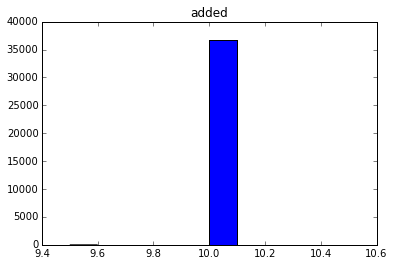

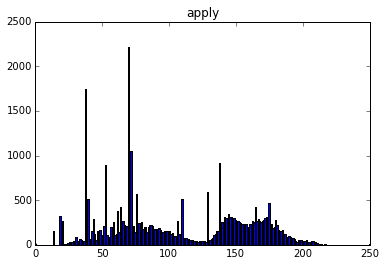

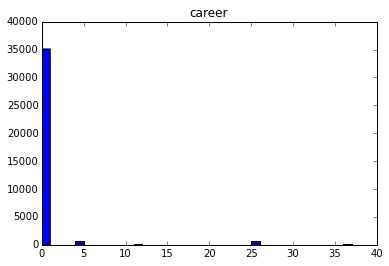

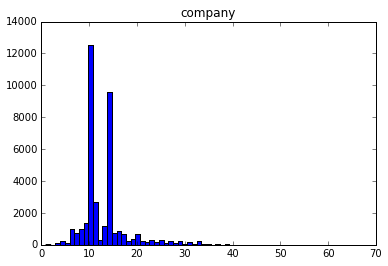

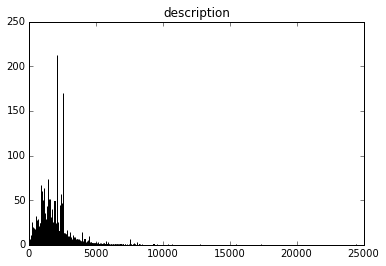

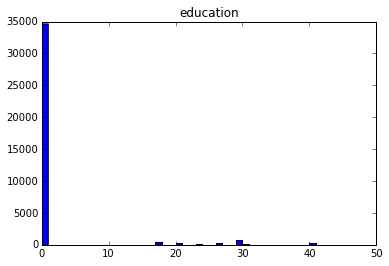

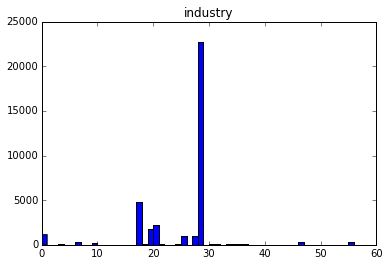

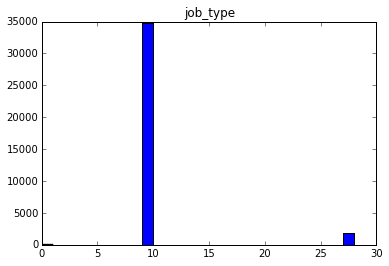

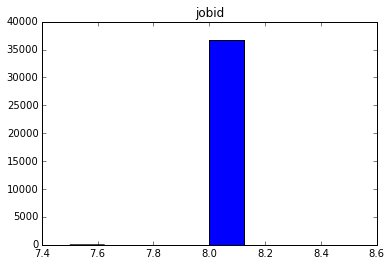

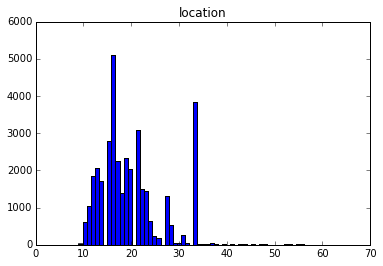

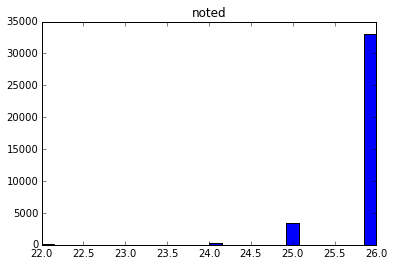

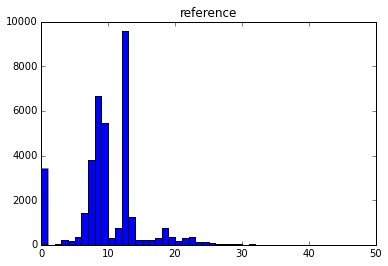

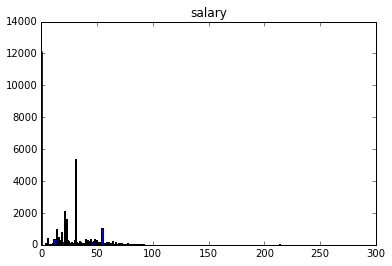

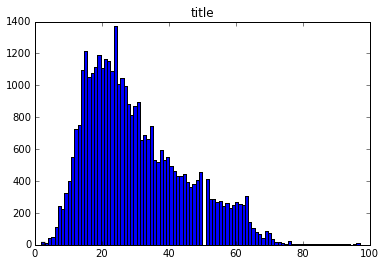

In [250]:
for column_name in df.columns:
    x = df[column_name].map(len)
    try:
        plt.title(column_name)
        h = plt.hist(x, x.max())
        plt.figure()
    except:
        print '{}: failed'.format(column_name)
        # The plot for the contact column failed, I think this is because this column is always empty.


Seems someone went HAM on the salay description, I guess people always get a little funny when it comes to £££. Let's look at what it says...

In [251]:
row = df[df["salary"].map(len) == 286]
print row

           added                                              apply career  \
2785  2015-07-28  http://jobview.monster.co.uk/Evening-Technolog...          

         company contact                                        description  \
2785  Monster UK          One of the US' leading Law Firms, who offer a ...   

     education              industry   job_type     jobid          location  \
2785            Other/not classified  Full time  17737861  UK-London-London   

                           noted  reference  \
2785  2015-07-30 23:23:34.656721  190723327   

                                                 salary  \
2785  38,000.00 - 38,000.00 per year + benefitsOne o...   

                                                  title  
2785  Evening Technology Support Analyst at Top US L...  


In [252]:
print row.salary.values

[ "38,000.00 - 38,000.00 per year + benefitsOne of the US' leading Law Firms, who offer a 24 hour IT support function, is recruiting a new IT professional to provide a seamless IT support/service to the London office through excellent customer service. Duties will include Desk side and Do"]


Actually it wasn't that long, I admit I'm bad at estimating what the length of a string looks like...

Looks like about 12,000 job listings don't give a salary value, how many is that as a percentage?

In [253]:
len(df)

36774

In [254]:
"{:.3f}%".format(len(df[df["salary"] == ""]) * 1. / len(df) * 100)

'32.887%'

Not too bad, I may have enough stats here to get some decent insights. Okay time to build the database.

## The Database
So why build a database? In my current set up I have a csv file which serves as a persistency storage mechanism and with that I can do my analysis with a data frame? To be honest I'm going on gut instinct that a database will be needed (because it normally is when deally with lots of data) but let's list some advantages and disadvantages. 

###Database advantages.
- More modifiable, if I were to change an entry in a file it would probably mean that I have to write the *whole* file out again.
- Indexing - databases use index to do quick searches for particular elements
- Professional - it just feels fancier using a database and I learnt how to use them so I want to
- Duplicates - There are daily CSV files, and since jobs don't come in go in the scope of a day there will be many many duplicates from the combination of files. A database provides a simple mechanism to remove these.
- One single file - or less files? Probably less. Imagine I want to look at jobs over the course of months, if I do that with csv files that will mean I need to open > 58 files, that feels like a bad thing right?
- It fits in with my web framework. I'm planning to publish this article on the web, perhaps even have it as an sort of interactive article where a user can play with the parameters of the analysis, for this I'll be using the Django framework which has database stuff built in, so I can use that framework rather than building my own system of opening files and manipulating them.
- Databases are optimised for data and have inbuilt CRUD and filtering mechanisms, if I use a CSV files I'll probably end up developing these mechanisms, that doesn't sound fun.

I was originally planning on having a section of database disadvantages, csv file advantages and csv file disadvantages but I'm already pretty sold on the idea of a database so let's call it a day on the whole pros and cons thing.

### The Django ORM
The Django Object-Relational Mapper (ORM) is a method of storing object orientated data in a relational database (or perhaps database in general). If you imagine a classical relational database as a table made up of rows and columns then each row in the table is like an object and each column corresponds to to an attribute of that object. e.g.


In [255]:
df[:3]

,added,apply,career,company,contact,description,education,industry,job_type,jobid,location,noted,reference,salary,title
0,2015-07-30,http://www.aplitrak.com/?adid=RGFtaWVubS41NDUw...,,LMR,,Class 2 tipper Drivers needed for various cont...,,Staffing/employment agencies,Full time,17750894,UK-TT-Newcastle upon Tyne,2015-07-30 23:45:01.0662,Tipper_1438261410,8.00 - 9.00 per hour GBP8.00 - GBP9 per hour +...,Class 2 Tipper Drivers
1,2015-07-30,Email: carla.austin@proactivepersonnel.net,Experienced (Non-Manager),Proactive Personnel Limited,,Proactive Personnel Ltd is proud to be represe...,,Engineering services,Full time,17751620,UK-TT-Newcastle upon Tyne,2015-07-30 23:45:00.736214,,11.00 - 13.00 per hour,HGV TECHNICIAN
2,2015-07-27,http://jobview.monster.co.uk/Area-Sales-Manage...,,Monster UK,,Excellent career opportunity for an experience...,,Other/not classified,Full time,17744370,UK-Southern-Sevenoaks,2015-07-30 23:45:00.547762,529S,"30,000.00 - 45,000.00 per year car, non contri...",Area Sales Manager - South East England


In the Django world this table would correspond to three objects, let's call them `JobListing` objects. Each of these `JobListing` objects have the attributes: `added`, `apply`, `career`, etc. There is a lot more richness to the ORM but in its essence that's all it is, it's a way of representing data in objects which in theory makes working with the data more intuitive and hence managable and more understandable.

So here's how my Django model looks so far

`from django.db import models`

`class JobListing(models.Model):`
    # jobid = models.IntegerField()
    # title = models.CharField(max_length=)
    # location = models.CharField(max_length=)
    # salary = models.CharField(max_length=)
    # career = models.CharField(max_length=)
    # company = models.CharField(max_length=)
    # industry = models.CharField(max_length=)
    # job_type = models.CharField(max_length=)
    # education = models.CharField(max_length=)
    # description = models.CharField(max_length=)
    # apply_ = models.CharField(max_length=)
    # reference = models.CharField(max_length=)
    # contact = models.CharField(max_length=)
    # added = models.CharField(max_length=)
    # noted = models.CharField(max_length=)                                                                               pass
    
Note: I'm using the sqlite3 software library to build my relational database. There are other options, MySQL and Postgres which have a reputation as more *professional* than sqlite3 but for my purposes it will suffice.

Also note that I've commented out all my attributes and haven't passed a value to the `max_length` parameters since I didn't know what to use as the limit for each of the fields (hence the whole previous section). So now I'll start filling in those details.

Here's version two of my model,

`from django.db import models`

`class JobListing(models.Model):`

    jobid = models.IntegerField(primary_key=True)
    title = models.CharField(max_length=100)
    location = models.CharField(max_length=100)
    salary = models.CharField(max_length=300)
    career = models.CharField(max_length=100)
    company = models.CharField(max_length=100)
    industry = models.CharField(max_length=100)
    job_type = models.CharField(max_length=100)    
    education = models.CharField(max_length=100)
    description = models.CharField(max_length=10000)
    apply = models.CharField(max_length=500)
    reference = models.CharField(max_length=100)
    #contact = models.CharField(max_length=)
    added = models.DateField()
    noted = models.CharField(max_length=100)

A few things to take note of here,

- I've set `jobid` as the `primary key` for my table (a database consists of tables, `JobListing` objects all 'live' together on the same table). This will hopefully enforce that there are no duplicate entries in my database.
- Most attributes I've set to a 'reasonable' value, in most cases larger than the maximum value I found in this single file (remember there is a file for each day so there may be job listings I've not seen with a higher maximum string length).
- Setting the `max_length` is important for telling the database how much space to reserve for each object. Each object will take up the same amount of space (in memory or on the hard drive), this means a job listing with a 5000 character description will take up the same as a job listing with 100 characters. Set a `max_length` value too high and there will be lots of wasted space, too low and you will truncate some data.
- The big player here is the `description` attribute, this contains most of the data though it is also very unstructured meaning it's difficult for a computer to extract meaning from it (this is where clever machine learning algorithms start to shine). I've set it to 10000, less than the maximum value of ~24,000 I found, but that's an edge case and I'm not massively disappointed if I truncate some data.
- I've left the contact attribute commented out, it seems like it's always empty and I'm fairly sure I won't need that data anyway.
- After exploring the data I found that the `added` attribute was always a date so I've decided to store it as a date object which gives it a bit more functionality such as calculating the difference between dates, it may come in useful... Probably not but whatever.


In [256]:
df['added'][:10]

0    2015-07-30
1    2015-07-30
2    2015-07-27
3    2015-07-27
4    2015-07-30
5    2015-07-30
6    2015-07-27
7    2015-07-30
8    2015-07-30
9    2015-07-30
Name: added, dtype: object

###Testing the model

Now let's test whether we can use this model together with our csv file. To get django to play nice with ipython notebook we need to define an environment variable called `DJANGO_SETTINGS_MODULE`.

In [257]:
import os
os.environ['DJANGO_SETTINGS_MODULE'] = 'data_science_jobs.settings'
from data_exploration.models import JobListing

In [258]:
jobs[0]

{'added': '2015-07-30',
 'apply': 'http://www.aplitrak.com/?adid=RGFtaWVubS41NDUwMy41ODE4QGxtci5hcGxpdHJhay5jb20',
 'career': '',
 'company': 'LMR',
 'contact': '',
 'description': 'Class 2 tipper Drivers needed for various contracts. Regular work Mon - Fri Days Must have relevant experience Digi card CPC cARD Apply',
 'education': '',
 'industry': 'Staffing/employment agencies',
 'job_type': 'Full time',
 'jobid': '17750894',
 'location': 'UK-TT-Newcastle upon Tyne',
 'noted': '2015-07-30 23:45:01.0662',
 'reference': 'Tipper_1438261410',
 'salary': '8.00 - 9.00 per hour GBP8.00 - GBP9 per hour + time and a half after 8 hours',
 'title': 'Class 2 Tipper Drivers'}

In [259]:
job = jobs[0]
del(job['contact']) # need to remove this since our model has no contact attribute
job = JobListing(**job)

In [260]:
print job

JobListing object


Not the most useful output but that can be changed later. One last check to see it's working okay.

In [261]:
for column_name in df.columns:
    if column_name == 'contact':
        continue
    print '{}: {}'.format(column_name, getattr(job, column_name))

added: 2015-07-30
apply: http://www.aplitrak.com/?adid=RGFtaWVubS41NDUwMy41ODE4QGxtci5hcGxpdHJhay5jb20
career: 
company: LMR
description: Class 2 tipper Drivers needed for various contracts. Regular work Mon - Fri Days Must have relevant experience Digi card CPC cARD Apply
education: 
industry: Staffing/employment agencies
job_type: Full time
jobid: 17750894
location: UK-TT-Newcastle upon Tyne
noted: 2015-07-30 23:45:01.0662
reference: Tipper_1438261410
salary: 8.00 - 9.00 per hour GBP8.00 - GBP9 per hour + time and a half after 8 hours
title: Class 2 Tipper Drivers


Note: the date (`added` attribute) has been automatically converted from a string to a date object, it was able to do this because luckily the date string was formatted with the ISO 8601 standard, someone at Universal Jobmatch is doing their job.

### Filtering the data
So now we have a nice data model and a means of storing our data permanantly in a database. However our data contains lots of different types of jobs and I'm only interested in looking at jobs related to data science. The way I'm going to filter the data is using a simple string search, any entry that has the words "data" and "science" in either the title or description will be kept, otherwise I won't add it to the database. Bear in mind this is quite a crude filtering system but as physicists love to say, it's a good enough approximation "to first order".

In [310]:
x = df['title'].map(lambda x: "data science" in x.lower() or "data scientist" in x.lower())
y = df['description'].map(lambda x: "data science" in x.lower() or "data scientist" in x.lower())
print '{} jobs passing title filter'.format(len(x[x==True]))
print '{} jobs passing description filter'.format(len(y[y==True]))
# for j in df['title']: # cross check whether search is working. Doesn't match up with the universal jobmatch website. Scraping is missing some jobs???
#     print j.lower()
print x[x==True].index # just doing some cross checking
print y[y==True].index

9 jobs passing title filter
44 jobs passing description filter
Int64Index([449, 4846, 5676, 16320, 17120, 17338, 26966, 29343, 36211], dtype='int64')
Int64Index([  449,  2086,  2152,  2425,  3090,  3104,  3994,  4727,  4846,
             5144,  5676, 10139, 10143, 10200, 10734, 16207, 16252, 16320,
            17120, 17338, 19366, 21316, 21361, 22385, 22412, 22413, 26298,
            26966, 27123, 29343, 29368, 29666, 30451, 30647, 31320, 31663,
            32733, 34507, 35299, 35366, 36211, 36216, 36271, 36510],
           dtype='int64')


In [304]:
z = DataFrame({'title': list(x.values), 'description': list(y.values)})
z = z.apply(lambda row: row['title'] or row['description'], axis=1)
print '{} jobs passing title or description filter'.format(len(z[z==True]))
df_filtered = df[z==True] # I'm sure there is a better way of doing the filtering in less lines of code but meh

44 jobs passing title or description filter


In [305]:
print '{} jobs in the filtered data frame'.format(len(df_filtered))

<class 'pandas.core.frame.DataFrame'>
44 jobs in the filtered data frame


In [299]:
print df_filtered

            added                                              apply career  \
449    2015-07-27  http://jobview.monster.co.uk/Data-Scientist-Ox...          
2086   2015-07-29  http://www.jobg8.com/ATSApply.aspx?l4upvflk1Oo...          
2152   2015-07-29  http://www.jobg8.com/Application.aspx?W7DNMhYO...          
2425   2015-07-27  http://jobview.monster.co.uk/2015-Computer-Sci...          
3090   2015-07-30  http://www.uk-recruitment.net/job/digital-acco...          
3104   2015-07-28  http://jobview.monster.co.uk/Product-Manager-P...          
3994   2015-07-30  http://www.uk-recruitment.net/job/senior-ios-d...          
4727   2015-07-29  http://www.jobg8.com/Application.aspx?W7DNMhYO...          
4846   2015-07-30  http://www.uk-recruitment.net/job/senior-data-...          
5144   2015-07-30  http://www.uk-recruitment.net/job/big-data-dev...          
5676   2015-07-28  http://jobview.monster.co.uk/Senior-Data-Scien...          
10139  2015-07-30  http://www.technojobs.co.uk/job.p

In [300]:
for index, row in df_filtered[:5].iterrows():
    print 'title: {}'.format(row['title'])
    print 'description: {}'.format(row['description'])
    print

title: Data Scientist - Oxfordshire
description: Data Scientist - Job Description A multi award winning B2B Digital Marketing Agency, based in the glorious North Oxfordshire countryside, is seeking an intellectually capable and self-motivated individual, with good written and communication skills, to fulfill the position of Data Scientist. The purpose of the role is to form a core part of a new team, integrating leading edge software tools and technology designed to deliver insight into the impact of digital marketing activity. You will be required to develop, integrate, refine and scale data management and analytics tools, procedures, systems, and workflows to ensure the company adopts and adheres to best practice - particularly in regard to utilising Machine Intelligence solutions to manage Big Data sets. You will therefore need to have experience utilising R and/or Python scripting - in addition to having a demonstrable foundation in SQL or related database management techniques to 

###Filtering results
So the new search functionality seems to be working okay, the odd dudd here and there which is not fatal but the most disconcerning thing is that when I do a manual search on the universal jobmatch website I get many more data scientist related job results (~250) which my simple search should be finding. After a bit of digging around it appears that it is probably because the scraping data I'm using doesn't have all the jobs in it? Intriguing... There maybe a good reason for this that hasn't occurred to me yet but I'm happy to just continue blissfully ignorant of it. The next step perhaps will be to visualise the data a little more, see what keywords are occurring the most, etc.